In [2]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
repositorio = 'https://github.com/golang/go.git'

In [3]:
commits = []

for commit in Repository(repositorio).traverse_commits():
    record = {
        'hash': commit.hash,
        'message': commit.msg,
        'author_name': commit.author.name,
        'author_email': commit.author.email,
        'author_date': commit.author_date,
        'committer_name': commit.committer.name,
        'committer_email': commit.committer.email,
        'committer_date': commit.committer_date,
       
            }
    commits.append(record)

# Save it to FileCommits.csv
df_commits = pd.DataFrame(commits)

In [3]:
df_commits = pd.read_csv("DF Commits Go.csv")

In [4]:
df_commits.to_csv('DF Commits Go.csv', index=False)

In [3]:
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,7d7c6a97f815e9279d08cfaea7d5efb5e90695a8,"hello, world\n\nR=ken\nDELTA=7 (7 added, 0 de...",Brian Kernighan,bwk,1972-07-18 19:05:45-05:00,Brian Kernighan,bwk,1972-07-18 19:05:45-05:00
1,0bb0b61d6a85b2a1a33dcbc418089656f2754d32,"convert to C\n\nR=dmr\nDELTA=6 (0 added, 3 de...",Brian Kernighan,bwk,1974-01-20 01:02:03-04:00,Brian Kernighan,bwk,1974-01-20 01:02:03-04:00
2,0744ac969119db8a0ad3253951d375eb77cfce9e,convert to Draft-Proposed ANSI C\n\nR=dmr\nDEL...,Brian Kernighan,research!bwk,1988-04-01 02:02:04-05:00,Brian Kernighan,research!bwk,1988-04-01 02:02:04-05:00
3,d82b11e4a46307f1f1415024f33263e819c222b8,last-minute fix: convert to ANSI C\n\nR=dmr\nD...,Brian Kernighan,bwk@research.att.com,1988-04-01 02:03:04-05:00,Brian Kernighan,bwk@research.att.com,1988-04-01 02:03:04-05:00
4,18c5b488a3b2e218c0e0cf2a7d4820d9da93a554,Go spec starting point.\n\nSVN=111041,Robert Griesemer,gri@golang.org,2008-03-02 20:47:34-08:00,Robert Griesemer,gri@golang.org,2008-03-02 20:47:34-08:00
...,...,...,...,...,...,...,...,...
60781,e126129d7612349874828685c2bcd49de498a1a0,cmd/compile/internal/ssa: combine shift and ad...,Joel Sing,joel@sing.id.au,2024-08-19 23:54:17+10:00,Joel Sing,joel@sing.id.au,2024-08-28 13:46:24+00:00
60782,fe63d483f4385ce7376f68abd37ad202e8ab798a,cmd/go: print the proper error message for set...,Michael Matloob,matloob@golang.org,2024-08-28 11:15:32-04:00,Michael Matloob,matloob@golang.org,2024-08-28 16:55:45+00:00
60783,6d52d7d22b70a5faa2868b6406ccdc7fd9b89083,slices: clarify Insert behavior if i == len(s)...,Ian Lance Taylor,iant@golang.org,2024-08-28 09:33:49-07:00,Gopher Robot,gobot@golang.org,2024-08-28 20:02:26+00:00
60784,9e8ea567c838574a0f14538c0bbbd83c3215aa55,cmd/compile/internal/noder: write V2 bitstream...,Tim King,taking@google.com,2024-08-26 15:49:09-07:00,Tim King,taking@google.com,2024-08-28 21:03:29+00:00


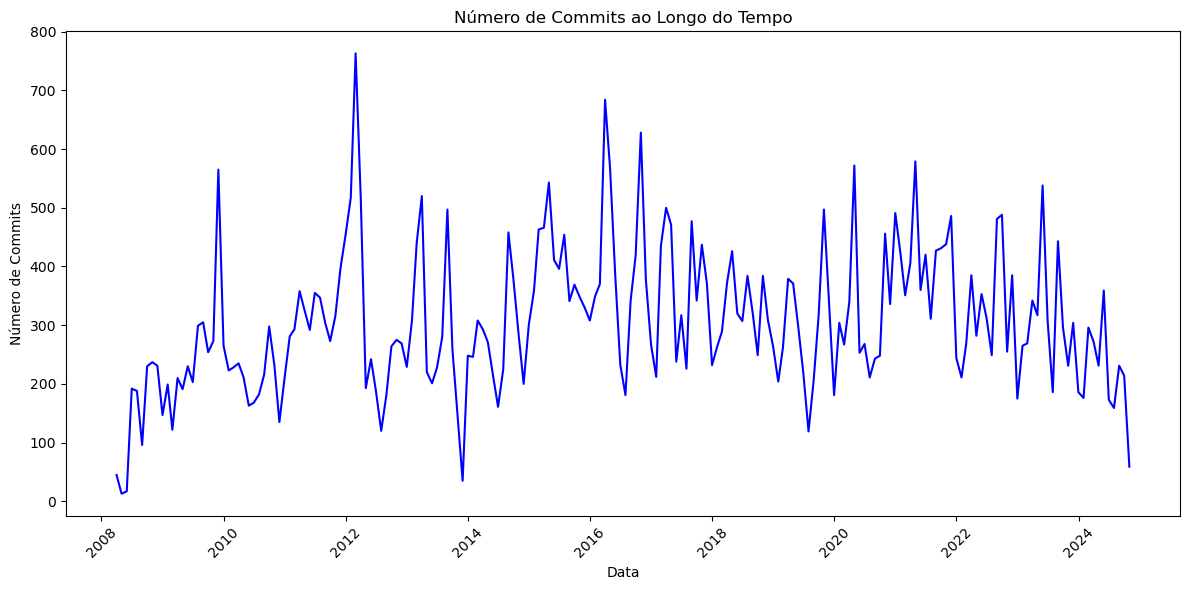

In [4]:
# Converter a coluna 'author_date' para datetime com timezone UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Remover linhas onde a conversão falhou (se houver)
df_commits = df_commits.dropna(subset=['author_date'])

# Filtrar para datas a partir de 2005
df_commits = df_commits[df_commits['author_date'].dt.year > 2004]

# Definir a coluna de data como índice
df_commits.set_index('author_date', inplace=True)

# Agrupar por mês e contar o número de commits
monthly_commits = df_commits.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_commits.index, y=monthly_commits.values, color='blue')
plt.title('Número de Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Commits')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


0 valores inválidos em 'author_date'


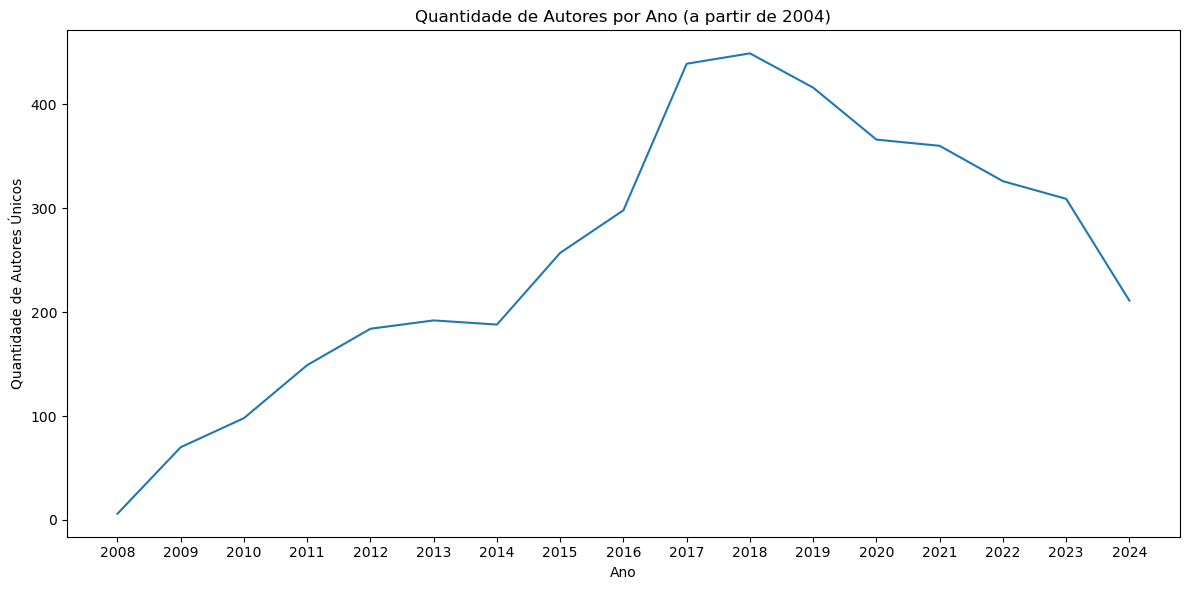

In [7]:
# Converter a coluna 'author_date' para datetime com fuso horário UTC
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['author_date'].isnull().sum(), "valores inválidos em 'author_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['author_date'])

# Extrair o ano da coluna 'author_date'
df_commits['year'] = df_commits['author_date'].dt.year

# Filtrar apenas os dados a partir de 2004
df_commits = df_commits[df_commits['year'] >= 2004]

# Contar o número de autores únicos por ano
authors_per_year = df_commits.groupby('year')['author_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano (a partir de 2004)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

0 valores inválidos em 'committer_date'


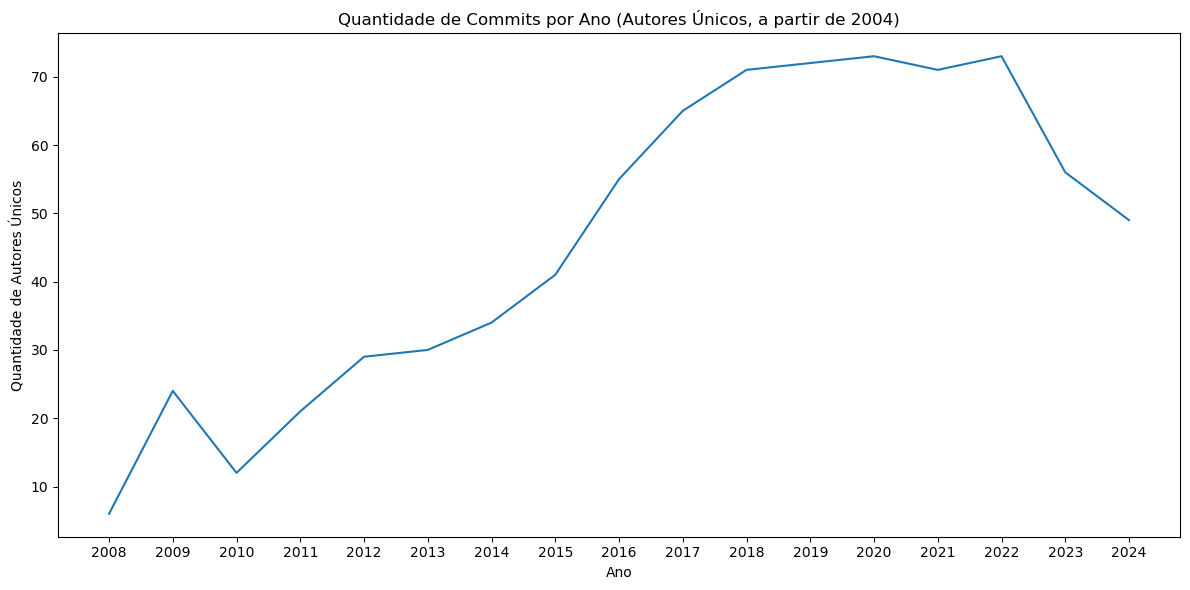

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'committer_date' para datetime com fuso horário UTC
df_commits['committer_date'] = pd.to_datetime(df_commits['committer_date'], errors='coerce', utc=True)

# Verificar se há valores nulos após a conversão
print(df_commits['committer_date'].isnull().sum(), "valores inválidos em 'committer_date'")

# Remover linhas com valores inválidos (opcional)
df_commits = df_commits.dropna(subset=['committer_date'])

# Extrair o ano da coluna 'committer_date'
df_commits['year'] = df_commits['committer_date'].dt.year

# Filtrar apenas os dados a partir de 2004
df_commits = df_commits[df_commits['year'] >= 2004]

# Contar o número de autores (committer_email) únicos por ano
authors_per_year = df_commits.groupby('year')['committer_email'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Commits por Ano (Autores Únicos, a partir de 2004)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Garantir que todos os anos sejam mostrados no eixo X
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()
